<a href="https://colab.research.google.com/github/hasmita-patnana7/OIBSIP/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Piyush Sunil Shekokare
#Oasis Infobyte Data Science Internship
#Task 5 : Sales Prediction using Python


Impoting Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [ ]:
df = pd.read_csv("/content/Advertising.csv.zip")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.drop('Unnamed: 0',axis=1, inplace= True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<Axes: xlabel='TV', ylabel='Sales'>

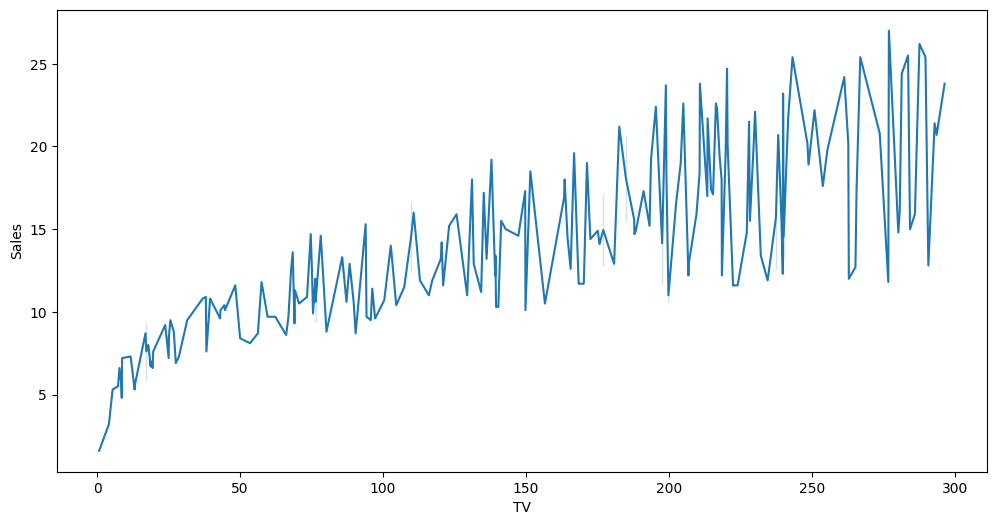

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['TV'],y=df['Sales'])

<Axes: xlabel='Radio', ylabel='Sales'>

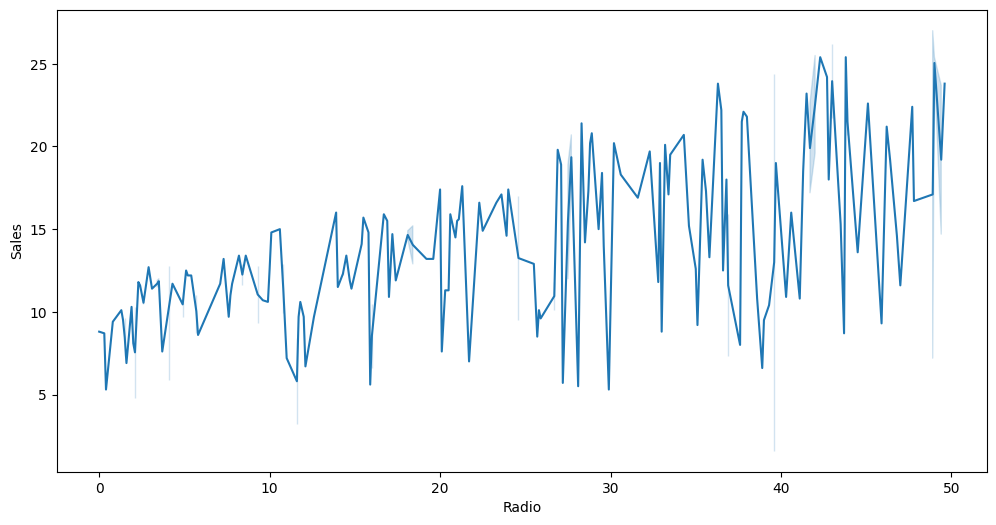

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Radio'],y=df['Sales'])

<Axes: xlabel='Newspaper', ylabel='Sales'>

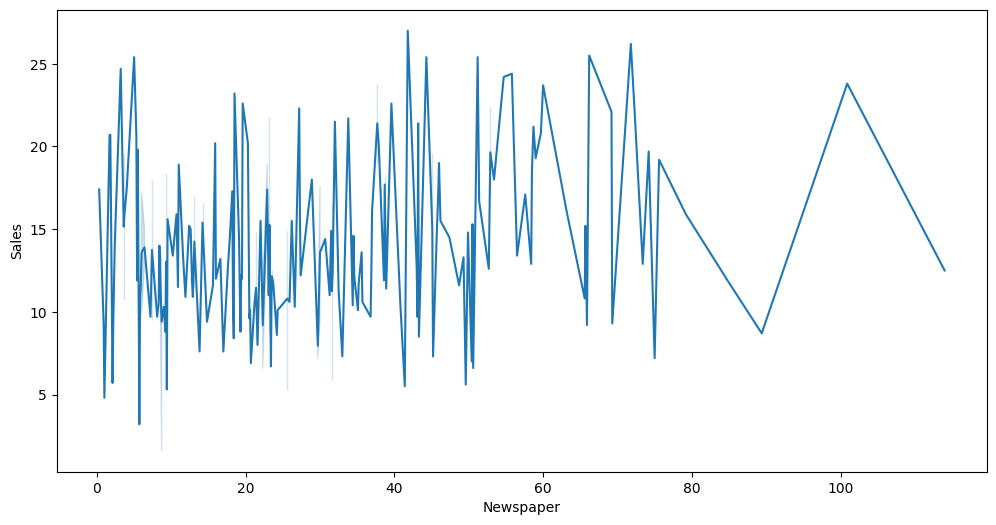

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Newspaper'],y=df['Sales'])

In [ ]:
X = df.iloc[: ,:-1]
Y = df.iloc[: ,-1]
X.head()
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

Splitting the dataset into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X , Y , test_size=0.3 , random_state=101)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(200, 3)
(140, 3)
(60, 3)


In [ ]:
print("X_train: ")
print(X_train.head())

X_train: 
        TV  Radio  Newspaper
85   193.2   18.4       65.7
183  287.6   43.0       71.8
127   80.2    0.0        9.2
53   182.6   46.2       58.7
100  222.4    4.3       49.8


In [ ]:
print("X_test: ")
print(X_test.head())

X_test: 
        TV  Radio  Newspaper
37    74.7   49.4       45.7
109  255.4   26.9        5.5
31   112.9   17.4       38.6
89   109.8   47.8       51.4
66    31.5   24.6        2.2


In [ ]:
print("Y_train: ")
print(Y_train.head())

Y_train: 
85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: Sales, dtype: float64


In [ ]:
print("Y_test: ")
print(Y_test.head())

Y_test: 
37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: Sales, dtype: float64


Regressor

In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor()

Training the Model on the dataset

In [ ]:
model.fit(X_train  , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred=model.predict(X_test)    # mean

Evaluating the Model

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
m = mean_absolute_error(Y_test , pred)
m = mean_squared_error(Y_test , pred)
r2 = r2_score(Y_test , pred)

In [ ]:
print("Mean absolute error: {}".format(round(m,3)))
print("Mean squared error: {}".format(round(m,3)))

Mean absolute error: 1.012
Mean squared error: 1.012


In [ ]:
print("r2 score: {}".format(round(r2,3)))

r2 score: 0.964


Testing the model

In [ ]:
tv = float(input("Cost of TV : "))
radio = float(input("Cost of Radio : "))
newspaper = float(input("Cost of newspaper : "))

Cost of TV : 1000
Cost of Radio : 600
Cost of newspaper : 200


In [ ]:
arr = [tv , radio , newspaper]
arr = np.array(arr)
arr = arr.reshape(1 , -1)

In [ ]:
result = model.predict(arr)

In [ ]:
print("Sales : {}".format(result))

Sales : [25.735668]
